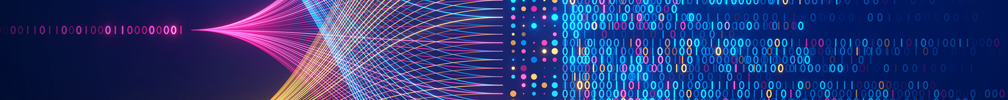

## Week 10 Overview
This week we will wrap up our coverage of pandas with visualization and exploratory data analysis. We have already seen that pandas makes selecting, grouping, and aggregating data easy. Now, we will use those features to drive visualizations and exploratory analysis. You may have heard that one of the most important things to do with a new dataset is to look at the data. We will now cover how to do that quickly, thoroughly, and easily in pandas.
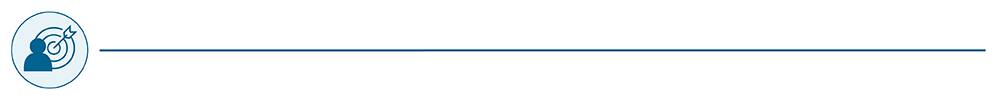

### Learning Objectives
At the end of this week, you should be able to:
- Visualize data using pandas
- Perform basic exploratory analysis using pandas
- Identify important variables for modeling
- Check for weird data provided for analysis

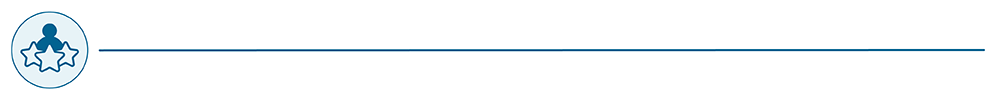

## Topic Overview
Pandas has many built-in visualizations for data frames. You have seen a few of them in passing the last couple of weeks. We will cover them more systematically now. Like NumPy, pandas builds upon Matplotlib, so the plotting interface is similar, but full of shortcuts like passing column names instead of sequences of data. And again like NumPy, you can manage and tweak your plots directly through Matplotlib controls.

### Topic Outline
- Visualize data using pandas

## 10.1 Lesson: Visualizing Data with Pandas
In this lesson, we will cover the most common visualizations of pandas data. Overall, pandas makes individual charts much easier compared to direct usage of Matplotlib and NumPy. In the few cases where pandas does not integrate as well, particularly for subplots, we will cover tips to fallback gracefully to Matplotlib.

### Plotting Histograms with Pandas
In this video, we will explore pandas options for plotting histograms. Pandas gives histogram special treatment compared to most plot types with a specialized hist function and built-in subplot support.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/main/data/abalone.tsv", sep="\t")
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


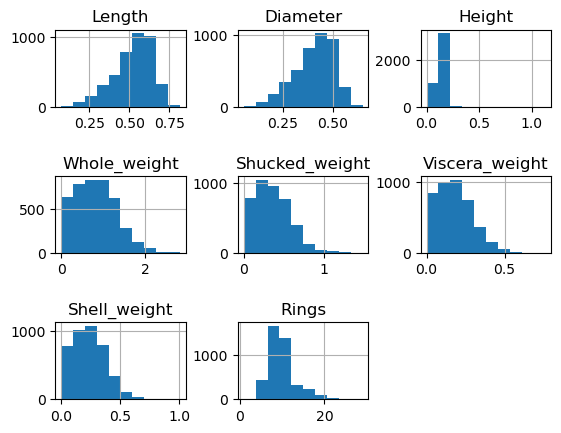

In [3]:
abalone.hist()
plt.subplots_adjust(wspace=0.4, hspace=0.9)

In [4]:
print(abalone.hist.__doc__) #call pd.hist documentation


    Make a histogram of the DataFrame's columns.

    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.

    .. _histogram: https://en.wikipedia.org/wiki/Histogram

    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequence, optional
        If passed, will be used to limit data to a subset of columns.
    by : object, optional
        If passed, then used to form histograms for separate groups.
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels. For example, a value of 90 displays the
        x labels rotated 90 degrees clockwise.
    ylabelsize : int, default None
        If specified changes the y-axis lab

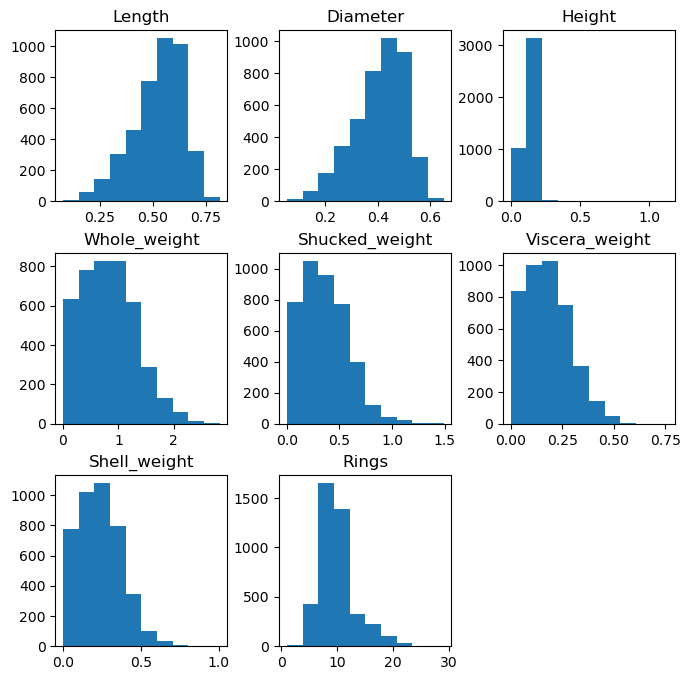

In [5]:
abalone.hist(figsize=(8, 8), grid=False)
None

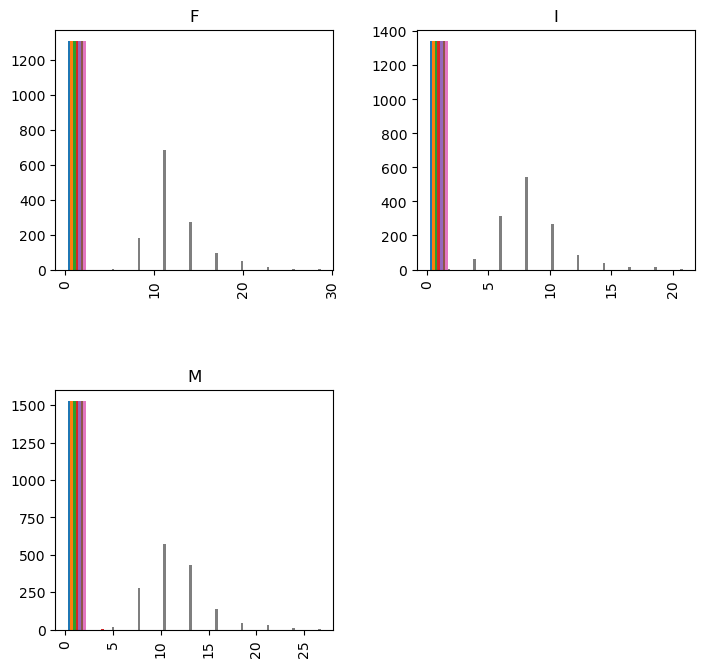

In [6]:
_ = abalone.hist(by="Sex", figsize=(8, 8), grid=False) #bad chart

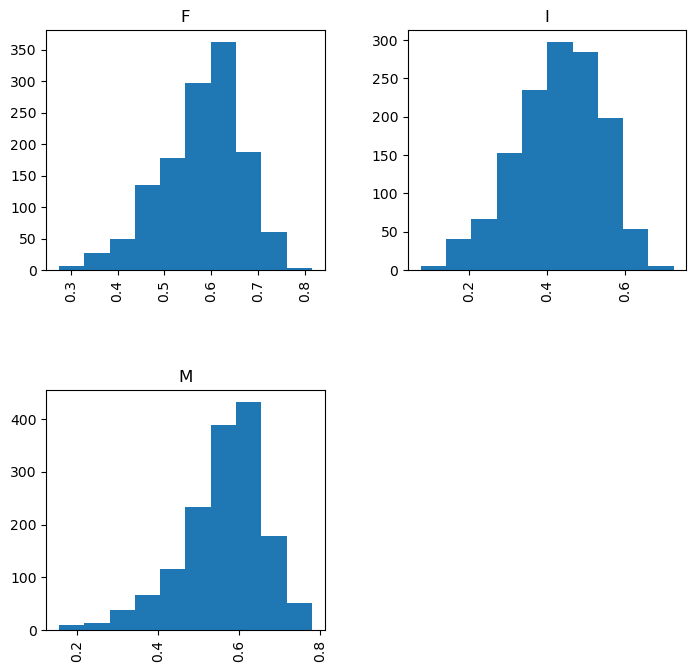

In [7]:
_ = abalone[["Sex", "Length"]].hist(by="Sex", figsize=(8, 8), grid=False)

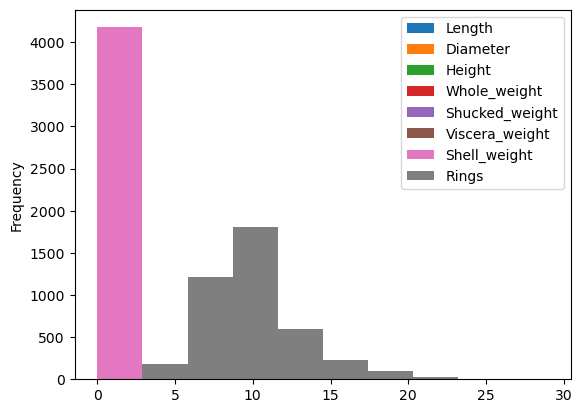

In [8]:
_ = abalone.plot.hist() # separate hist function but this one isn't great either. 

In [9]:
print(abalone.plot.hist.__doc__)


        Draw one histogram of the DataFrame's columns.

        A histogram is a representation of the distribution of data.
        This function groups the values of all given Series in the DataFrame
        into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
        This is useful when the DataFrame's Series are in a similar scale.

        Parameters
        ----------
        by : str or sequence, optional
            Column in the DataFrame to group by.

            .. versionchanged:: 1.4.0

               Previously, `by` is silently ignore and makes no groupings

        bins : int, default 10
            Number of histogram bins to be used.
        **kwargs
            Additional keyword arguments are documented in
            :meth:`DataFrame.plot`.

        Returns
        -------
        class:`matplotlib.AxesSubplot`
            Return a histogram plot.

        See Also
        --------
        DataFrame.hist : Draw histograms per DataFrame's Series.
    

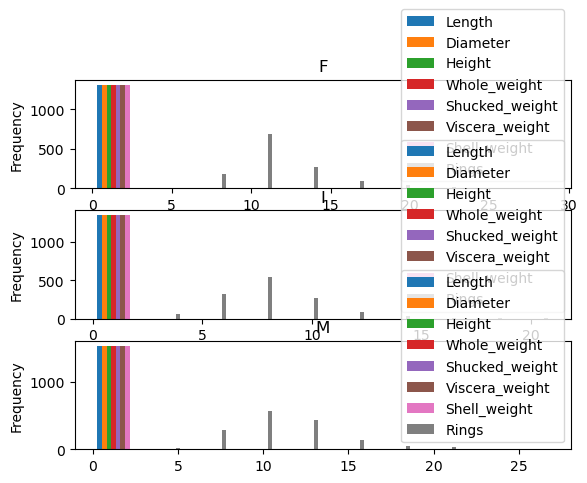

In [10]:
_ = abalone.plot.hist("Sex")

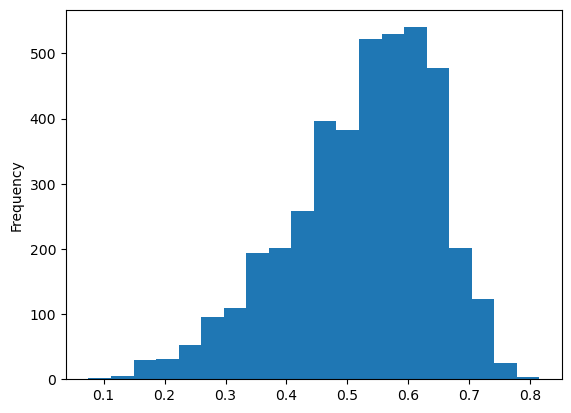

In [11]:
_ = abalone["Length"].plot.hist(bins=20)

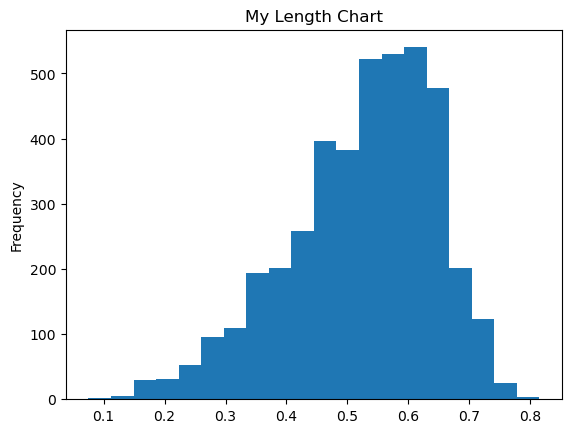

In [12]:
_ = abalone['Length'].plot(kind='hist', bins=20, title='My Length Chart')

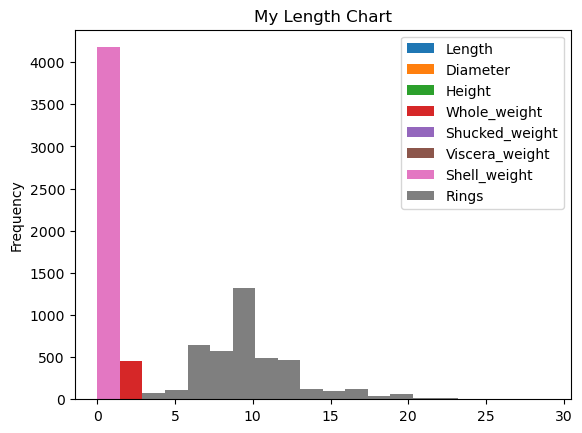

In [13]:
_ = abalone.plot(kind='hist', bins=20, title='My Length Chart')

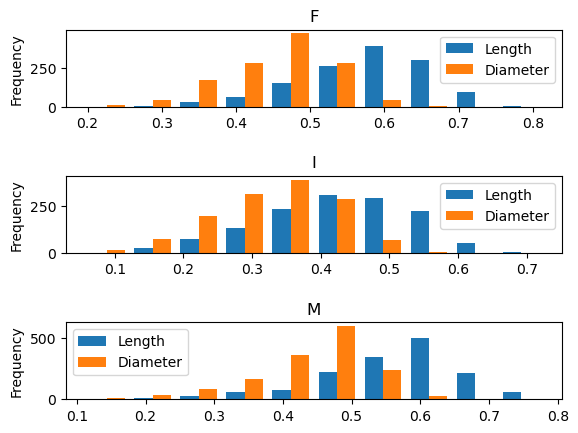

In [14]:
_ = abalone.plot.hist(column=["Length", "Diameter"], by="Sex")
plt.subplots_adjust(hspace=0.9)

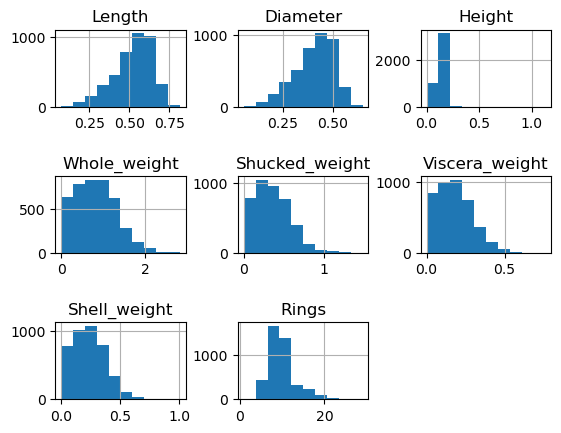

In [15]:
pd.plotting.hist_frame(abalone)
plt.subplots_adjust(wspace=0.4, hspace=0.9)
None

### Plotting Scatterplots with Pandas
This video shows off pandas support for making scatter plots easily. Scatter plots are also on the short list with dedicated pandas support, and the scatter_matrix function gives a great way to explore connections between all pairs of variables if you have the space to see them.

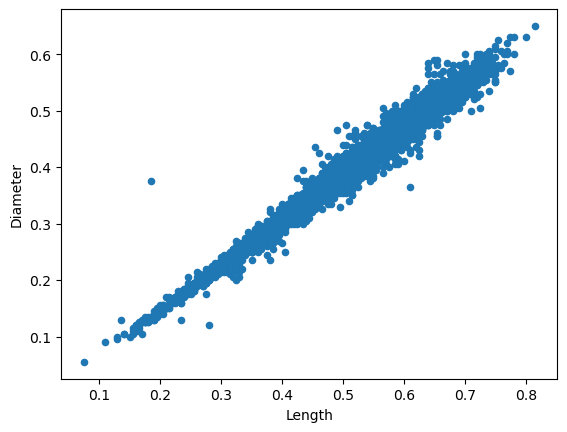

In [16]:
_ = abalone.plot.scatter("Length", "Diameter") #hard to see

The alpha parameter controls the transparency of each point

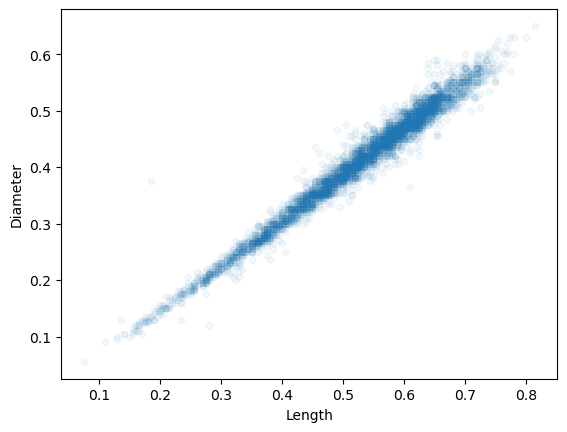

In [17]:
_ = abalone.plot.scatter("Length", "Diameter", alpha=0.05)

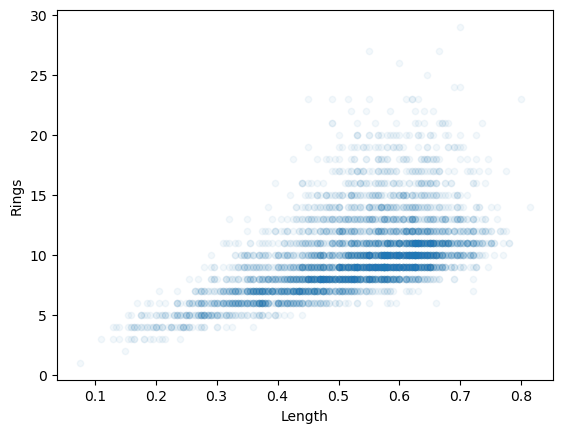

In [18]:
_ = abalone.plot.scatter("Length", "Rings", alpha=0.05)

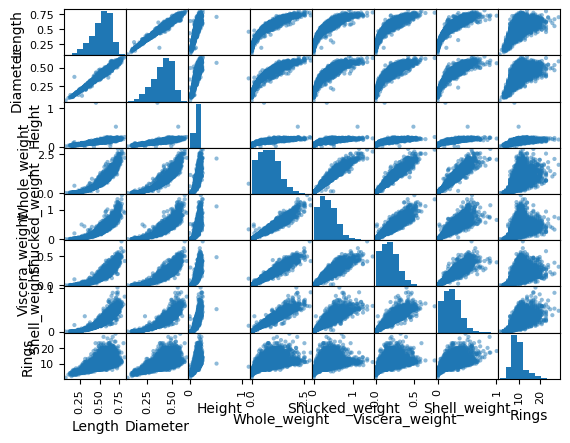

In [19]:
_ = pd.plotting.scatter_matrix(abalone) #still hard to read

In [20]:
print(pd.plotting.scatter_matrix.__doc__) #read the documentation to find the alpha 


    Draw a matrix of scatter plots.

    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        Amount of transparency applied.
    figsize : (float,float), optional
        A tuple (width, height) in inches.
    ax : Matplotlib axis object, optional
    grid : bool, optional
        Setting this to True will show the grid.
    diagonal : {'hist', 'kde'}
        Pick between 'kde' and 'hist' for either Kernel Density Estimation or
        Histogram plot in the diagonal.
    marker : str, optional
        Matplotlib marker type, default '.'.
    density_kwds : keywords
        Keyword arguments to be passed to kernel density estimate plot.
    hist_kwds : keywords
        Keyword arguments to be passed to hist function.
    range_padding : float, default 0.05
        Relative extension of axis range in x and y with respect to
        (x_max - x_min) or (y_max - y_min).
    **kwargs
        Keyword arguments to be passed to scatter function.

    Returns
   

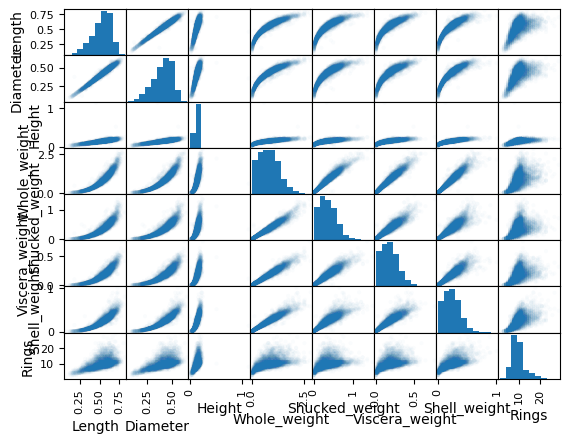

In [21]:
_ = pd.plotting.scatter_matrix(abalone, alpha=0.02) #slight upgrade

### Plotting Lines and Bars with Pandas
This video covers the more generic plotting support in pandas with a focus on line and bar charts.

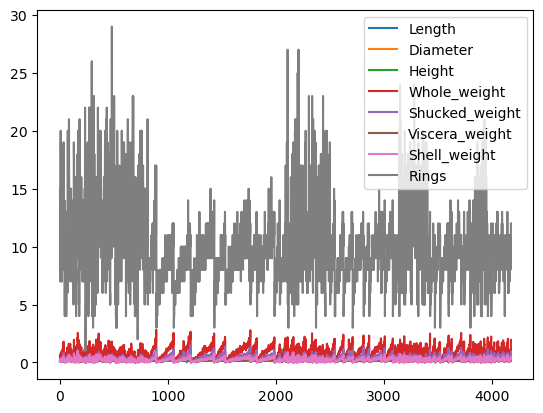

In [22]:
_ = abalone.plot()

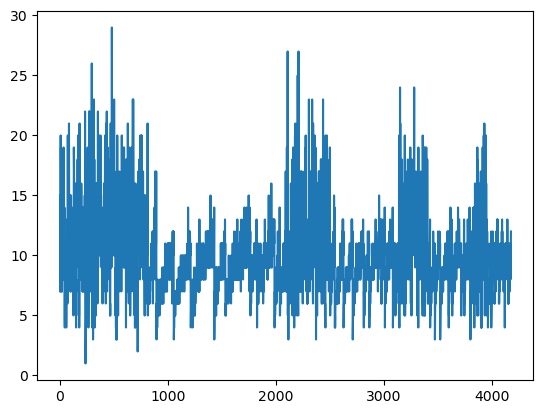

In [23]:
_ = abalone["Rings"].plot()

one major glaring issue here - the x-axis is the index of the dataframe

### Grouping before Plotting
Possible answer:
- Trends in the dataset by a particular column 
- (e.g. average length/diameter/height by abalone rings)

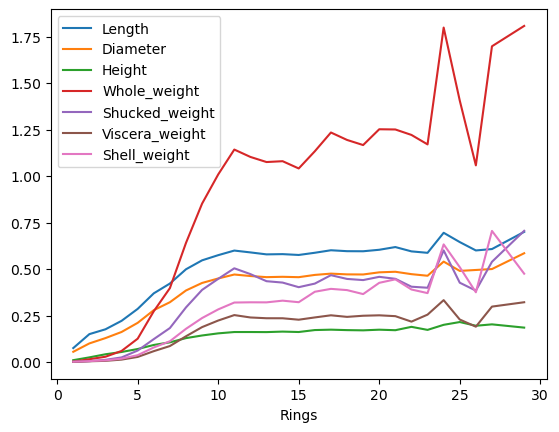

In [24]:
_ = abalone.groupby("Rings").mean(numeric_only=True).plot() 
#plot other values by the "rings" 

Looks like the length levels off around 10, let's check that... 

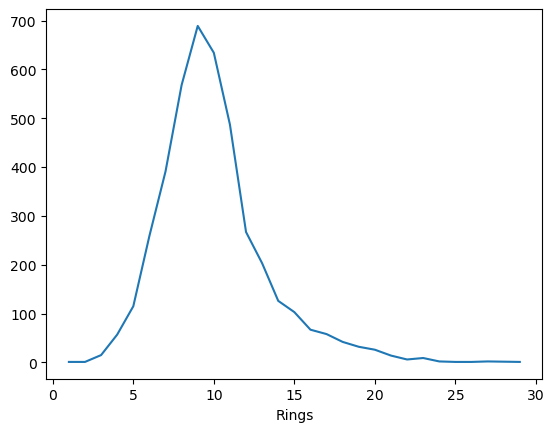

In [25]:
_ = abalone.groupby("Rings").size().plot()

In [26]:
abalone.nunique() #check distinct values for each column

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

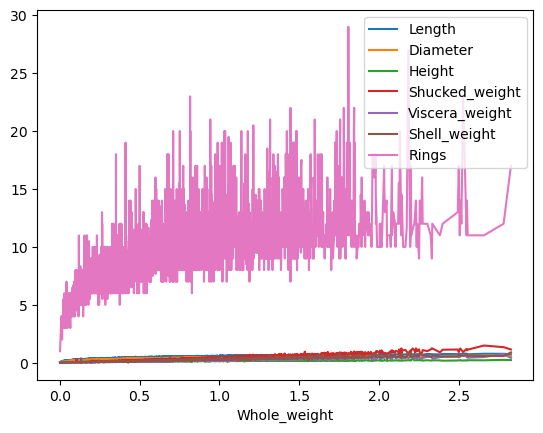

In [27]:
_ = abalone.groupby("Whole_weight").mean(numeric_only=True).plot() #group & plot 

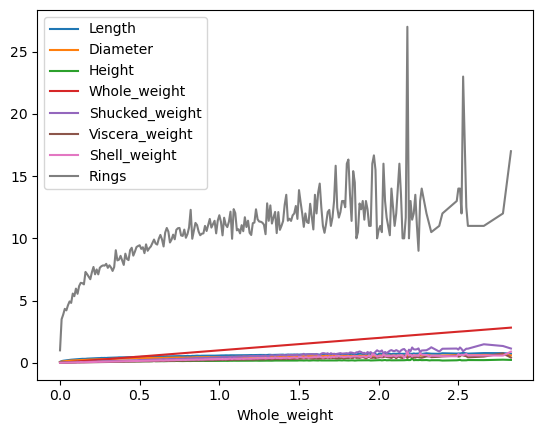

In [28]:
_ = abalone.groupby(abalone["Whole_weight"].round(2)).mean(numeric_only=True).plot()

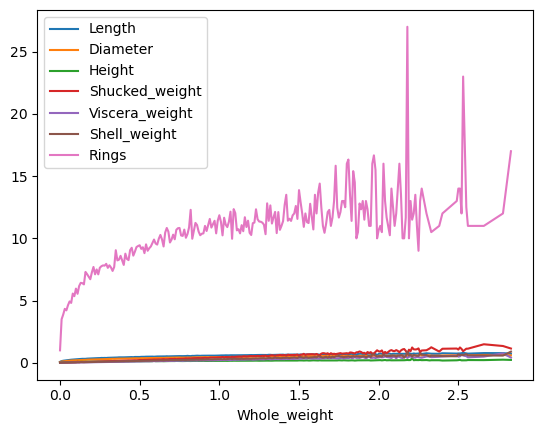

In [29]:
_ = abalone.groupby(abalone["Whole_weight"].round(2)).mean(numeric_only=True).drop("Whole_weight", axis=1).plot()

The rings column has many more distinct values than the rest of the chart, obscuring trends, let's drop it from the chart. 

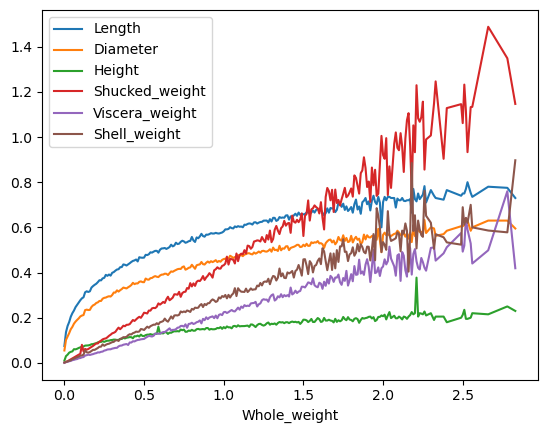

In [30]:
_ = abalone.groupby(abalone["Whole_weight"].round(2)).mean(numeric_only=True).drop(["Rings", "Whole_weight"], axis=1).plot()

### Plotting Bar Charts with Pandas
- similar mechanics to line charts
- bar charst tend to be more appropriate for volume data

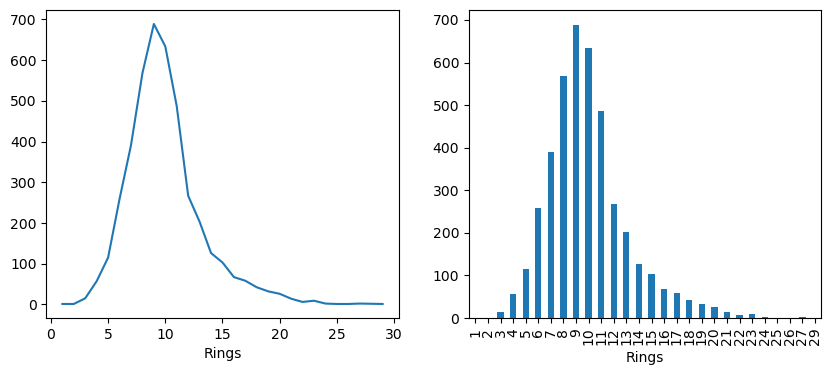

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
abalone.groupby("Rings").size().plot()
plt.subplot(1, 2, 2)
abalone.groupby("Rings").size().plot(kind="bar")
None

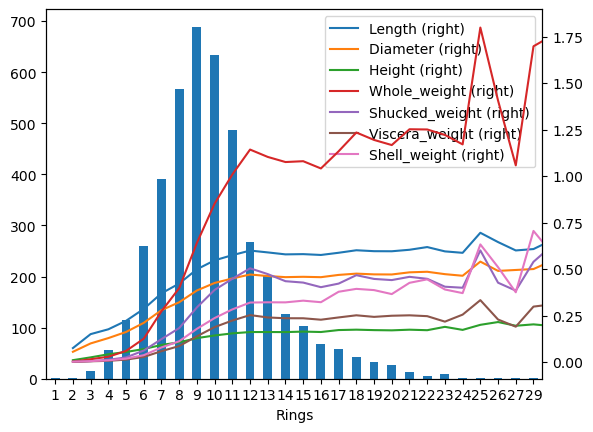

In [32]:
ax1 = abalone.groupby("Rings").size().plot(kind="bar")
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=ax1, secondary_y=True)
None

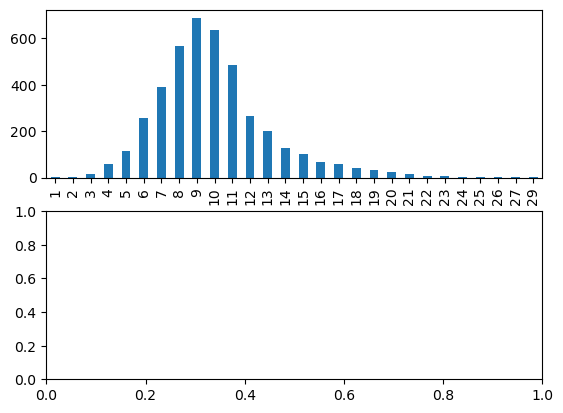

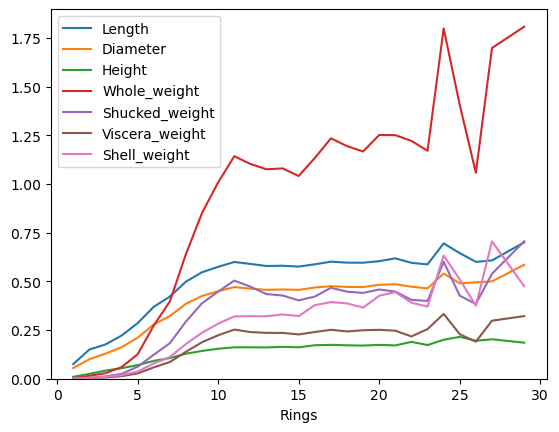

In [33]:
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot()
ax2.set_ylim(0)
None

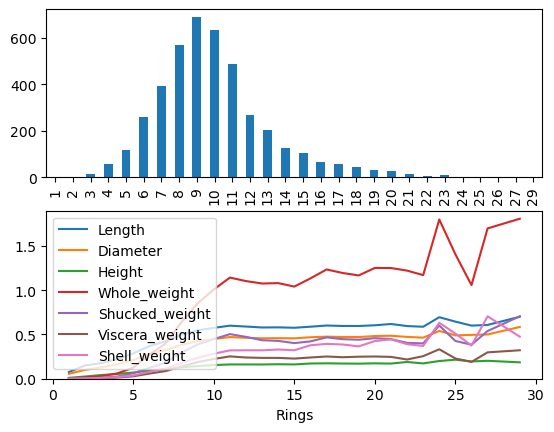

In [34]:
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=plt.gca())
ax2.set_ylim(0)
None

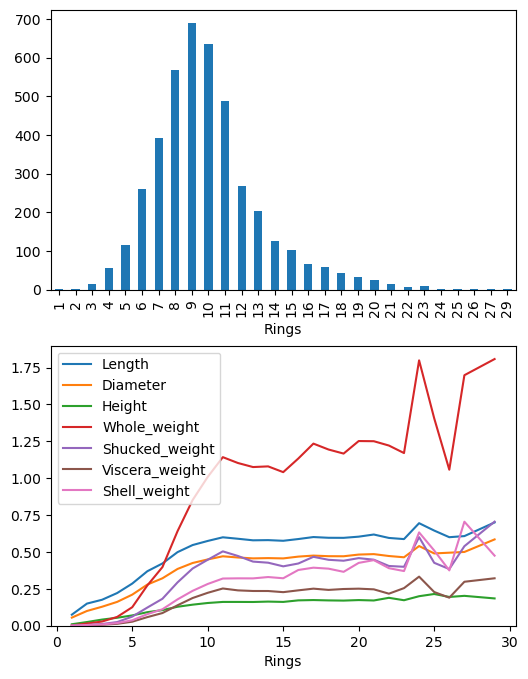

In [35]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=plt.gca())
ax2.set_ylim(0)
None

## Topic 2: Exploratory Data Analysis 

### Topic Overview
We will now cover basic exploratory analysis using pandas to get started. Pandas will help get basic statistics and charts quickly, though we will often fall back to matplotlib for nicer charts after identifying more interesting ones using pandas. The grouping functionality of pandas covered last week will also be used for quick explorations, and recommendations to avoid false positives will also be covered.

#### Learning Objectives
- Perform basic exploratory analysis using Pandas
- Identify important variables for modeling
- Check for weird data provided for analysis

## 10.3 Lesson: Introduciton to Exploratory Data Analysis 
In this lesson, we will introduce the basic ideas and motivations of exploratory data analysis. After motivating the concept, we will continue with an example of exploratory data analysis using the Palmer Penguins dataset.

### What is Exploratory Data Analysis?
Exploratory data analysis is an umbrella term for a set of techniques used to determine what is in a dataset, and whether it will be useful for a task at hand. 